<a href="https://colab.research.google.com/github/NHS-ML-AI/TRUCK_DIRECTION/blob/main/PRUEBAS_DATASET_NEW__YOLOv8_object_detection_TRUCK_DIRECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GPU Check

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Sep 10 01:24:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/235.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="842eH5st27fccsurRelP")
project = rf.workspace("container-rnvq9").project("truck_direction_dataset")
version = project.version(3)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TRUCK_DIRECTION_DATASET-3 in yolov8:: 100%|██████████| 2425/2425 [00:00<00:00, 5675.71it/s]


## Validate Custom Model

In [7]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/best.pt data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

## Inference with Custom Model

In [8]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

**NOTE:** Let's take a look at few results.

In [9]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[3:12]


In [10]:
## Función auxialiar

def create_image_grid(image_list, grid_size, output_path):
    """
    Crea una cuadrícula de imágenes y guarda el resultado en un archivo.

    :param image_list: Lista de objetos de imagen PIL.
    :param grid_size: Tupla (filas, columnas) que define el tamaño de la cuadrícula.
    :param output_path: Ruta del archivo de salida donde se guardará la imagen de la cuadrícula.
    """
    # Verifica que el número de imágenes coincida con el tamaño de la cuadrícula
    if len(image_list) != grid_size[0] * grid_size[1]:
        raise ValueError("El número de imágenes no coincide con el tamaño de la cuadrícula.")

    # Obtener el tamaño de las imágenes
    img_width, img_height = image_list[0].size

    # Crear una nueva imagen para la cuadrícula
    grid_width = img_width * grid_size[1]
    grid_height = img_height * grid_size[0]
    grid_image = Image.new('RGB', (grid_width, grid_height))

    # Colocar las imágenes en la cuadrícula
    for index, img in enumerate(image_list):
        row = index // grid_size[1]
        col = index % grid_size[1]
        x = col * img_width
        y = row * img_height
        grid_image.paste(img, (x, y))

    # Guardar la imagen de la cuadrícula
    grid_image.save(output_path)

    return grid_image

In [13]:
from PIL import Image
ls_img=[]
# Display each image
for image_path in image_paths:
    img_val = Image.open(image_path)
    ls_img.append(img_val)

# Grid image
grid_size = (3, 3)  # num filas y num columnas

# Ruta del archivo de salida
output_path = 'cuadricula.jpg'


grid_image=create_image_grid(ls_img, grid_size, output_path)

In [14]:
len(ls_img)

9

In [15]:
type(img_val)

PIL.JpegImagePlugin.JpegImageFile

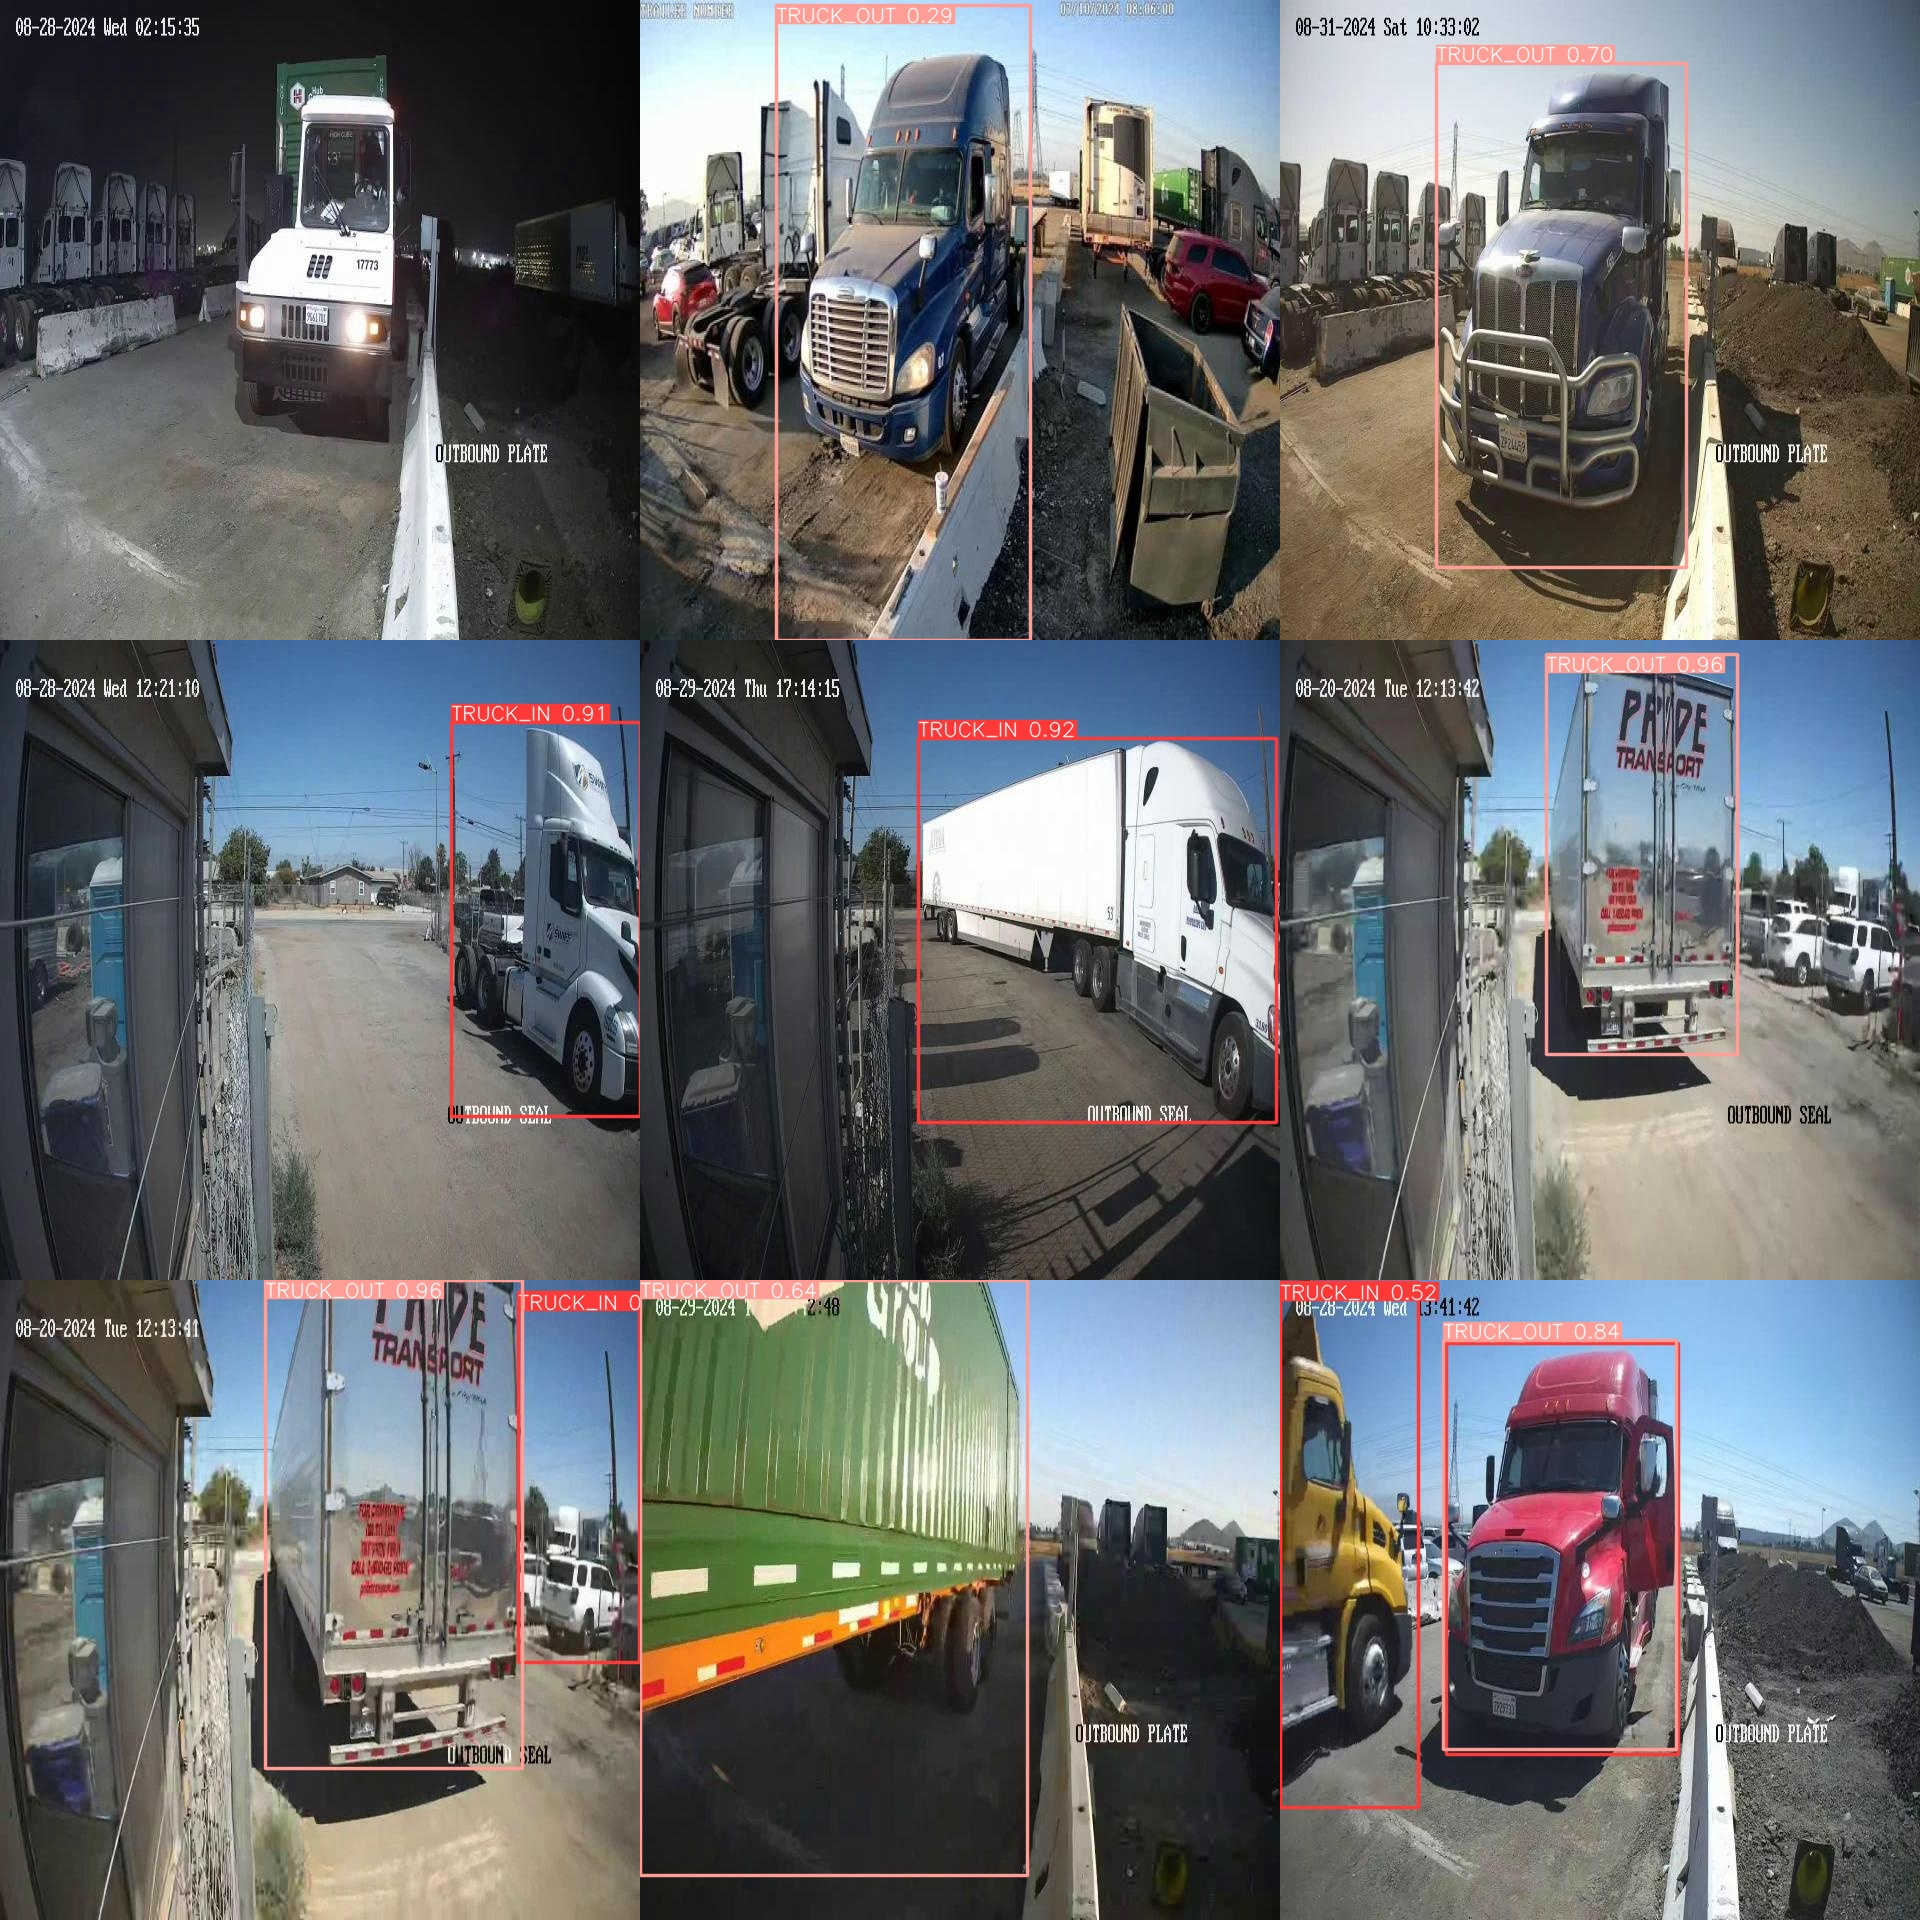

In [16]:
grid_image